# Error measure
- I think MSE and MAPE is a better measure of error because it does not scale with the size of the data as can be seen from the value from 1D and 2D calculation.
- L2 norm changes when the number of time steps changes.

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

### 1D Array

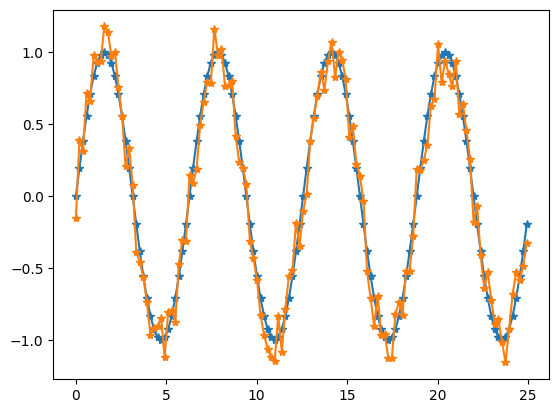

In [70]:
n = 128  # Number of grid
L = 8 * np.pi  # Length of the domain
dx = L / n  # Grid spacing

x = np.linspace(0, L - dx, num=n)
yTrue = np.sin(x)
yPred = yTrue + (np.random.random(n) - 0.5) * 2 * 0.2

plt.plot(x, yTrue, "-*")
plt.plot(x, yPred, "-*")

In [71]:
print(np.linalg.norm(yPred - yTrue))
print(mean_squared_error(yPred, yTrue))
print(mean_absolute_error(yPred, yTrue))

1.347499395288448
0.0141855829711151
0.10462673956812651


### 2D Array

In [72]:
n = 128  # Number of grid
L = 8 * np.pi  # Length of the domain
dx = L / n  # Grid spacing
tTot = 100
mArray = np.arange(0, tTot)
x = np.linspace(0, L - dx, num=n)


yTrue = np.zeros((tTot, n))

for m in mArray:
    yTrue[m, :] = np.sin(x) * np.sin(2 * np.pi * (m + 1) / 40) * 0.1


yPred = yTrue + (np.random.random((tTot, n)) - 0.5) * 2 * 0.2
# plt.plot(x, yTrue, "-*")
# plt.plot(x, yPred , "-*")

In [73]:
import plotly.graph_objects as go


def surface(data, x, mArray):
    fig = go.Figure(data=[go.Surface(z=data, x=x, y=mArray)])

    fig.update_layout(
        title="Density Profile",
        scene=dict(
            xaxis_title="X",
            yaxis_title="Time",
            zaxis_title="Atomic Density",
            aspectmode="manual",
            aspectratio=dict(x=2, y=1, z=1),
        ),
        autosize=False,
        height=600,
        width=800,
        margin=dict(l=65, r=50, b=65, t=90),
        scene_camera=dict(
            up=dict(x=0, y=0, z=1),
            center=dict(x=0, y=0, z=-0.2),
            eye=dict(x=1, y=-2, z=1),
        ),
    )
    fig.show()

In [74]:
surface(data=yTrue, x=x, mArray=mArray)

In [75]:
surface(data=yPred, x=x, mArray=mArray)

In [76]:
print(np.linalg.norm(yPred - yTrue))
print(mean_squared_error(yPred, yTrue))
print(mean_absolute_error(yPred, yTrue))

12.932963197690805
0.013067307583814435
0.09869455291315993


In [77]:
mseArray = []
mapeArray = []
for m in mArray:
    mseArray.append(mean_squared_error(yPred[m, :], yTrue[m, :]))
    mapeArray.append(mean_absolute_error(yPred[m, :], yTrue[m, :]))

print(np.mean(mseArray))
print(np.mean(mapeArray))

0.013067307583814431
0.09869455291315993
